In [1]:
!pip install keras

In [2]:
#Librerias
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import random
from shutil import rmtree
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard
from keras.utils import to_categorical
#from keras_preprocessing.image import load_img, img_to_array, array_to_img, save_img

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#NHS TIPO NIC1 SEG
#307
image_ids_array = ['I264211_C1.jpg', 'I169320_C2.jpg', 'I166612_C1.jpg', 'I169320_C1.jpg', 'I166612_C2.jpg', 'I150818_C2.jpg', 'I150818_C1.jpg', 'I149745_C2.jpg', 'I149745_C1.jpg', 'I133591_C2.jpg', 'I126100_C1.jpg', 'I133591_C1.jpg', 'I126100_C2.jpg', 'I124361_C1.jpg', 'I103738_C1.jpg', 'I103738_C2.jpg', 'I124361_C2.jpg', 'I124032_C2.jpg', 'I124032_C1.jpg', 'I264211_C2.jpg', 'I342192_C2.jpg', 'I342192_C1.jpg', 'I339977_C2.jpg', 'I335731_C2.jpg', 'I326517_C1.jpg', 'I324210_C2.jpg', 'I339977_C1.jpg', 'I335731_C1.jpg', 'I326517_C2.jpg', 'I324210_C1.jpg', 'I298042_C2.jpg', 'I295650_C1.jpg', 'I295650_C2.jpg', 'I293440_C1.jpg', 'I274386_C2.jpg', 'I293440_C2.jpg', 'I313616_C2.jpg', 'I298042_C1.jpg', 'I313616_C1.jpg', 'I274386_C1.jpg', 'I522521_C1.jpg', 'I517492_C2.jpg', 'I493937_C1.jpg', 'I493937_C2.jpg', 'I517492_C1.jpg', 'I505766_C2.jpg', 'I505766_C1.jpg', 'I474789_C1.jpg', 'I478042_C1.jpg', 'I478042_C2.jpg', 'I474789_C2.jpg', 'I466728_C2.jpg', 'I466728_C1.jpg', 'I437637_C1.jpg', 'I437637_C2.jpg', 'I371059_C2.jpg', 'I368134_C2.jpg', 'I368134_C1.jpg', 'I371059_C1.jpg', 'I352381_C2.jpg', 'I352381_C1.jpg', 'I635482_C1.jpg', 'I633710_C1.jpg', 'I633710_C2.jpg', 'I630618_C1.jpg', 'I630618_C2.jpg', 'I608976_C2.jpg', 'I608935_C1.jpg', 'I608976_C1.jpg', 'I608935_C2.jpg', 'I595301_C2.jpg', 'I592231_C2.jpg', 'I592231_C1.jpg', 'I595301_C1.jpg', 'I584458_C1.jpg', 'I584458_C2.jpg', 'I580816_C1.jpg', 'I580149_C1.jpg', 'I580816_C2.jpg', 'I580149_C2.jpg', 'I545787_C2.jpg', 'I579989_C1.jpg', 'I535966_C2.jpg', 'I545787_C1.jpg', 'I579989_C2.jpg', 'I535966_C1.jpg', 'I527027_C1.jpg', 'I527027_C2.jpg', 'I522521_C2.jpg', 'I743469_C1.jpg', 'I743435_C2.jpg', 'I704275_C2.jpg', 'I743333_C1.jpg', 'I677963_C1.jpg', 'I702418_C1.jpg', 'I691209_C2.jpg', 'I743333_C2.jpg', 'I702418_C2.jpg', 'I704275_C1.jpg', 'I691209_C1.jpg', 'I677963_C2.jpg', 'I662039_C1.jpg', 'I643611_C1.jpg', 'I672531_C1.jpg', 'I662039_C2.jpg', 'I672531_C2.jpg', 'I668441_C2.jpg', 'I668441_C1.jpg', 'I643611_C2.jpg', 'I635482_C2.jpg', 'I743893_C1.jpg', 'I743892_C2.jpg', 'I743892_C1.jpg', 'I743874_C1.jpg', 'I743834_C2.jpg', 'I743874_C2.jpg', 'I743834_C1.jpg', 'I743827_C2.jpg', 'I743714_C2.jpg', 'I743827_C1.jpg', 'I743704_C2.jpg', 'I743635_C2.jpg', 'I743624_C1.jpg', 'I743624_C2.jpg', 'I743635_C1.jpg', 'I743507_C1.jpg', 'I743507_C2.jpg', 'I743622_C2.jpg', 'I743550_C1.jpg', 'I743622_C1.jpg', 'I743476_C2.jpg', 'I744362_C1.jpg', 'I744351_C1.jpg', 'I744351_C2.jpg', 'I744335_C2.jpg', 'I744345_C2.jpg', 'I744345_C1.jpg', 'I744294_C2.jpg', 'I744335_C1.jpg', 'I744294_C1.jpg', 'I744206_C2.jpg', 'I744175_C1.jpg', 'I744206_C1.jpg', 'I744114_C2.jpg', 'I744131_C1.jpg', 'I744175_C2.jpg', 'I744129_C1.jpg', 'I744131_C2.jpg', 'I744129_C2.jpg', 'I744114_C1.jpg', 'I744029_C2.jpg', 'I743893_C2.jpg', 'I743951_C2.jpg', 'I743951_C1.jpg', 'I744029_C1.jpg', 'I744074_C2.jpg', 'I744074_C1.jpg', 'I744068_C2.jpg', 'I744068_C1.jpg', 'I744722_C1.jpg', 'I744694_C2.jpg', 'I744691_C2.jpg', 'I744694_C1.jpg', 'I744691_C1.jpg', 'I744599_C2.jpg', 'I744606_C2.jpg', 'I744606_C1.jpg', 'I744624_C2.jpg', 'I744624_C1.jpg', 'I744599_C1.jpg', 'I744548_C2.jpg', 'I744457_C2.jpg', 'I744443_C2.jpg', 'I744472_C2.jpg', 'I744457_C1.jpg', 'I744548_C1.jpg', 'I744406_C2.jpg', 'I744472_C1.jpg', 'I744406_C1.jpg', 'I744443_C1.jpg', 'I744362_C2.jpg', 'I745157_C1.jpg', 'I745139_C2.jpg', 'I745136_C2.jpg', 'I745139_C1.jpg', 'I745136_C1.jpg', 'I745096_C2.jpg', 'I745085_C2.jpg', 'I745092_C2.jpg', 'I745096_C1.jpg', 'I745092_C1.jpg', 'I745024_C2.jpg', 'I745047_C2.jpg', 'I745047_C1.jpg', 'I745085_C1.jpg', 'I745024_C1.jpg', 'I744912_C2.jpg', 'I744912_C1.jpg', 'I744778_C2.jpg', 'I744751_C2.jpg', 'I744751_C1.jpg', 'I744722_C2.jpg', 'I744732_C2.jpg', 'I744778_C1.jpg', 'I744732_C1.jpg', 'I745824_C2.jpg', 'I745838_C2.jpg', 'I745838_C1.jpg', 'I745847_C1.jpg', 'I745796_C1.jpg', 'I745824_C1.jpg', 'I745791_C2.jpg', 'I745796_C2.jpg', 'I745756_C1.jpg', 'I745743_C1.jpg', 'I745709_C1.jpg', 'I745308_C1.jpg', 'I745543_C1.jpg', 'I745308_C2.jpg', 'I745562_C1.jpg', 'I745484_C2.jpg', 'I745290_C1.jpg', 'I745266_C1.jpg', 'I745290_C2.jpg', 'I745266_C2.jpg', 'I745232_C2.jpg', 'I745157_C2.jpg', 'I745165_C2.jpg', 'I745165_C1.jpg', 'I745232_C1.jpg', 'I746524_C1.jpg', 'I746431_C1.jpg', 'I746360_C2.jpg', 'I746360_C1.jpg', 'I746308_C2.jpg', 'I746308_C1.jpg', 'I746274_C2.jpg', 'I746259_C1.jpg', 'I746123_C1.jpg', 'I746123_C2.jpg', 'I746174_C2.jpg', 'I746072_C1.jpg', 'I746035_C2.jpg', 'I746035_C1.jpg', 'I746072_C2.jpg', 'I745983_C2.jpg', 'I745930_C2.jpg', 'I745957_C1.jpg', 'I745930_C1.jpg', 'I745847_C2.jpg', 'I745886_C2.jpg', 'I745957_C2.jpg', 'I745983_C1.jpg', 'I745964_C2.jpg', 'I745964_C1.jpg', 'I745886_C1.jpg', 'I750994_C1.jpg', 'I747684_C1.jpg', 'I751566_C1.jpg', 'I751566_C2.jpg', 'I753457_C1.jpg', 'I750994_C2.jpg', 'I753457_C2.jpg', 'I747104_C2.jpg', 'I747104_C1.jpg', 'I747028_C2.jpg', 'I746771_C2.jpg', 'I746614_C2.jpg', 'I746614_C1.jpg', 'I746692_C2.jpg', 'I746596_C1.jpg', 'I746556_C1.jpg', 'I746566_C2.jpg', 'I746692_C1.jpg', 'I746556_C2.jpg', 'I746539_C1.jpg', 'I746566_C1.jpg', 'I746524_C2.jpg', 'I746539_C2.jpg', 'I746431_C2.jpg', 'I860432_C2.jpg', 'I860432_C1.jpg', 'I858460_C2.jpg', 'I858460_C1.jpg', 'I836429_C2.jpg', 'I845923_C1.jpg', 'I850562_C1.jpg', 'I849456_C2.jpg', 'I850562_C2.jpg', 'I849456_C1.jpg', 'I845923_C2.jpg', 'I836429_C1.jpg', 'I802100_C1.jpg', 'I782433_C1.jpg', 'I810715_C1.jpg', 'I765390_C2.jpg', 'I765390_C1.jpg', 'I763975_C1.jpg', 'I802100_C2.jpg', 'I810715_C2.jpg', 'I763975_C2.jpg', 'I875628_C1.jpg', 'I862260_C1.jpg', 'I875628_C2.jpg', 'I874390_C2.jpg', 'I874390_C1.jpg', 'I862260_C2.jpg']
print(len(image_ids_array))

307


In [5]:
#Cargar Dataset CITOBOT
url="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/PruebasCITOBOT_Anon.csv"
data1 = pd.read_csv(url, header=0)

data1.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
data1 = data1.loc[data1['CASE_NUMBER'] <= 'Case 223']
data1['PATH'] = data1['PATH'].str.replace("PruebasCITOBOT_Anon/", "PruebasCITOBOT_AnonSEG/")
data1 = data1[data1['CASE_NUMBER'] != 'Case 169']
data1['DIAGN'] = data1['DIAGN'].replace({3: 2})
data1['DIAGN'] = data1['DIAGN'].replace({4: 2})
data1 = data1[data1['DIAGN'] != 5]
print(data1['DIAGN'].value_counts())
data1

0    265
1    116
2     34
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,Case 001,2,20230411101755.jpg,PruebasCITOBOT_AnonSEG/Case 001/,0
1,Case 001,2,20230411101702.jpg,PruebasCITOBOT_AnonSEG/Case 001/,0
2,Case 002,2,20230411100907.jpg,PruebasCITOBOT_AnonSEG/Case 002/,0
3,Case 002,2,20230411100934.jpg,PruebasCITOBOT_AnonSEG/Case 002/,0
4,Case 003,2,20230411100207.jpg,PruebasCITOBOT_AnonSEG/Case 003/,0
...,...,...,...,...,...
505,Case 220,2,20230530100347.jpg,PruebasCITOBOT_AnonSEG/Case 220/,1
506,Case 221,2,20230530094711.jpg,PruebasCITOBOT_AnonSEG/Case 221/,0
507,Case 221,2,20230530094612.jpg,PruebasCITOBOT_AnonSEG/Case 221/,0
511,Case 223,2,20230530093319.jpg,PruebasCITOBOT_AnonSEG/Case 223/,0


In [6]:
#Cargar Dataset WHO
url2="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/Dataset_WHOSeg.csv"
data2 = pd.read_csv(url2, header=0)

data2.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
data2 = data2.drop(data2[data2.IMAGE_ID == "AAJK5.jpg"].index)
data2['DIAGN'] = data2['DIAGN'].replace({3: 2})
print(data2['DIAGN'].value_counts())
data2

2    464
1    133
0    124
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,14.0,AAHE,AAHE.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
1,14.0,AAHE,AAHE0.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
2,14.0,AAHE,AAHE1.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
3,14.0,AAHE,AAHE3.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
4,14.0,AAHE,AAHE4.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
...,...,...,...,...,...
717,184.0,AEU,AEU1.jpg,WHO_SEG/IARCImageBankVIA/Case 184/,2
718,185.0,ADF,ADF0.jpg,WHO_SEG/IARCImageBankVIA/Case 185/,2
719,185.0,ADF,ADF1.jpg,WHO_SEG/IARCImageBankVIA/Case 185/,2
720,186.0,ABK,ABK0.jpg,WHO_SEG/IARCImageBankVIA/Case 186/,2


In [7]:
#Cargar Dataset NCI
url3="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/trainingDatasetSEG.csv"
data3 = pd.read_csv(url3, header=0)

data3.columns = ['PATIENT_IDR', 'IMAGE_ID', 'AGE_GRP', 'WRST_HIST_AFTER', 'WRST_HIST_AFTER_DT', 'HPV_STATUS', 'HPV_DT', 'TIMEPNT', 'PATH']

#Imagenes que no estan segmentadas =================================
data3 = data3.drop(data3[data3.IMAGE_ID == "I770636_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I862299_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I344141_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I741415_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I584615_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I325700_C1.jpg"].index)
#===================================================================

data3 = data3[((data3['PATH'] == 'training_SEG/Biopsy_Study/') & (data3['WRST_HIST_AFTER'].isin([0, 1]))) | ((data3['PATH'] == 'training_SEG/NHS/') & (data3['WRST_HIST_AFTER'] == 0))]
data3 = data3.rename(columns={'WRST_HIST_AFTER': 'DIAGN'})
data3 = data3.rename(columns={'PATIENT_IDR': 'CASE_NUMBER'})
data3 = data3.rename(columns={'AGE_GRP': 'CASE_ID'})
data3 = data3.drop('WRST_HIST_AFTER_DT', axis=1)
data3 = data3.drop('HPV_STATUS', axis=1)
data3 = data3.drop('HPV_DT', axis=1)
data3 = data3.drop('TIMEPNT', axis=1)
data3 = data3.reindex(columns=['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN'])
#dataC1 = data3[data3['DIAGN'] == 0]
#dataC2 = data3[data3['DIAGN'] == 1]
#data_aleatoria = dataC1.sample(n=531)
#data_aleatoria2 = dataC2.sample(n=58)
#data3 = pd.concat([data_aleatoria, data_aleatoria2])
print(data3['DIAGN'].value_counts())
data3

0    531
1    192
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,P100316,2,I389059.jpg,training_SEG/Biopsy_Study/,1
1,P101187,2,I687505.jpg,training_SEG/Biopsy_Study/,0
4,P110406,5,I239297.jpg,training_SEG/Biopsy_Study/,0
5,P111612,5,I545805.jpg,training_SEG/Biopsy_Study/,1
6,P115183,4,I149285.jpg,training_SEG/Biopsy_Study/,0
...,...,...,...,...,...
76652,P899409,5,I325700_C2.jpg,training_SEG/NHS/,0
76653,P899409,5,I553280_C1.jpg,training_SEG/NHS/,0
76654,P899409,5,I553280_C2.jpg,training_SEG/NHS/,0
76655,P899409,5,I853803_C1.jpg,training_SEG/NHS/,0


In [8]:
#Cargar Dataset Kaggle
url4="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/kaggleDataset_SEG.csv"
data4 = pd.read_csv(url4, header=0)

data4.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
#data4['DIAGN'] = data4['DIAGN'].replace({2: 1})
dataC0 = data4[data4['DIAGN'] == 0]
dataC1 = data4[data4['DIAGN'] == 1]
dataC2 = data4[data4['DIAGN'] == 2]
data_aleatoria0 = dataC0.sample(n=244)
data_aleatoria1 = dataC1.sample(n=574)
data_aleatoria2 = dataC2.sample(n=435)
data4 = pd.concat([data_aleatoria0, data_aleatoria1, data_aleatoria2])
print(data4['DIAGN'].value_counts())
data4

1    574
2    435
0    244
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
55,0,0,1289.jpg,Kaggle_SEG/Type_1/,0
238,0,0,96.jpg,Kaggle_SEG/Type_1/,0
139,0,0,441.jpg,Kaggle_SEG/Type_1/,0
67,0,0,1370.jpg,Kaggle_SEG/Type_1/,0
123,0,0,356.jpg,Kaggle_SEG/Type_1/,0
...,...,...,...,...,...
1186,0,0,18.jpg,Kaggle_SEG/Type_3/,2
1264,0,0,391.jpg,Kaggle_SEG/Type_3/,2
1200,0,0,214.jpg,Kaggle_SEG/Type_3/,2
1086,0,0,1206.jpg,Kaggle_SEG/Type_3/,2


In [9]:
data = pd.concat([data2, data3, data4])
data

,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,14.0,AAHE,AAHE.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
1,14.0,AAHE,AAHE0.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
2,14.0,AAHE,AAHE1.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
3,14.0,AAHE,AAHE3.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
4,14.0,AAHE,AAHE4.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
...,...,...,...,...,...
1186,0,0,18.jpg,Kaggle_SEG/Type_3/,2
1264,0,0,391.jpg,Kaggle_SEG/Type_3/,2
1200,0,0,214.jpg,Kaggle_SEG/Type_3/,2
1086,0,0,1206.jpg,Kaggle_SEG/Type_3/,2


In [10]:
#Distribuir clases (3)
print(data['DIAGN'].value_counts())

0    899
1    899
2    899
Name: DIAGN, dtype: int64


In [11]:
#Balancear Clase de Salida.
#g = data.groupby('DIAGN')
#dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
#data = dataBal
#print(data['DIAGN'].value_counts())

In [12]:
#Procesar y Cargar Imagenes

def process_image(filepath):
  img = tf.io.read_file(filepath)
  img = tf.image.decode_jpeg(img)
  img = tf.image.resize(img, [224, 224])
  img = tf.image.rgb_to_grayscale(img)  # convertir a escala de grises
  img = tf.image.convert_image_dtype(img, tf.float32)  # convertir a tipo float32
  img /= 255.0  # Normalizar píxeles al rango [0, 1]
  return img

In [13]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 40,
    zoom_range = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip = True
)

In [14]:
#Arquitectura googlenet
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense,Dropout,Activation,Conv2D, MaxPooling2D,Flatten,BatchNormalization, concatenate, Input, AveragePooling2D


def Conv2d_BN(x, nb_filter, kernel_size, padding='same', strides=(1, 1), name=None):
    if name is not None:
        bn_name = name + '_bn'
        conv_name = name + '_conv'
    else:
        bn_name = None
        conv_name = None

    x = Conv2D(nb_filter, kernel_size, padding=padding, strides=strides, activation='relu', name=conv_name)(x)
    x = BatchNormalization(axis=3, name=bn_name)(x)
    return x


def Inception(x, nb_filter):
    branch1x1 = Conv2d_BN(x, nb_filter, (1, 1), padding='same', strides=(1, 1), name=None)

    branch3x3 = Conv2d_BN(x, nb_filter, (1, 1), padding='same', strides=(1, 1), name=None)
    branch3x3 = Conv2d_BN(branch3x3, nb_filter, (3, 3), padding='same', strides=(1, 1), name=None)

    branch5x5 = Conv2d_BN(x, nb_filter, (1, 1), padding='same', strides=(1, 1), name=None)
    branch5x5 = Conv2d_BN(branch5x5, nb_filter, (1, 1), padding='same', strides=(1, 1), name=None)

    branchpool = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branchpool = Conv2d_BN(branchpool, nb_filter, (1, 1), padding='same', strides=(1, 1), name=None)

    x = concatenate([branch1x1, branch3x3, branch5x5, branchpool], axis=3)

    return x


def modelCompile():
  inpt = Input(shape=(224,224, 1))
  x = Conv2d_BN(inpt, 64, (7, 7), strides=(2, 2), padding='same')
  x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
  x = Conv2d_BN(x, 192, (3, 3), strides=(1, 1), padding='same')
  x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
  x = Inception(x, 64)  # 256
  x = Inception(x, 120)  # 480
  x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
  x = Inception(x, 128)  # 512
  x = Inception(x, 128)
  x = Inception(x, 128)
  x = Inception(x, 132)  # 528
  x = Inception(x, 208)  # 832
  x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
  x = Inception(x, 208)
  x = Inception(x, 256)  # 1024
  x = AveragePooling2D(pool_size=(7, 7), strides=(7, 7), padding='same')(x)
  x = Dropout(0.7)(x)
  x = Flatten()(x)
  x = Dense(1000, activation='relu')(x)
  x = Dense(3, activation='softmax')(x)

  model = Model(inpt, x, name='inception')
  #model = multi_gpu_model(model, gpus=2)

  # model = multi_gpu_model(model,4)
  #model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])
  return model

model = modelCompile()
model.summary()

Model: "inception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 64)         3200      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 56, 56, 64)           0         ['batch_normalization[

Iteracion:  1
Epoch 1/150
54/54 [==============================] - 48s 166ms/step - loss: 1.0623 - accuracy: 0.4771 - val_loss: 1.2206 - val_accuracy: 0.3403
Epoch 2/150
54/54 [==============================] - 7s 135ms/step - loss: 0.9904 - accuracy: 0.5391 - val_loss: 1.3528 - val_accuracy: 0.3403
Epoch 3/150
54/54 [==============================] - 7s 135ms/step - loss: 0.9589 - accuracy: 0.5478 - val_loss: 1.1957 - val_accuracy: 0.3426
Epoch 4/150
54/54 [==============================] - 7s 135ms/step - loss: 0.9794 - accuracy: 0.5374 - val_loss: 1.4569 - val_accuracy: 0.2801
Epoch 5/150
54/54 [==============================] - 7s 134ms/step - loss: 0.9362 - accuracy: 0.5693 - val_loss: 1.4157 - val_accuracy: 0.3519
Epoch 6/150
54/54 [==============================] - 7s 133ms/step - loss: 0.9457 - accuracy: 0.5513 - val_loss: 3.3312 - val_accuracy: 0.3426
Epoch 7/150
54/54 [==============================] - 7s 134ms/step - loss: 0.9469 - accuracy: 0.5629 - val_loss: 1.2793 - val_a

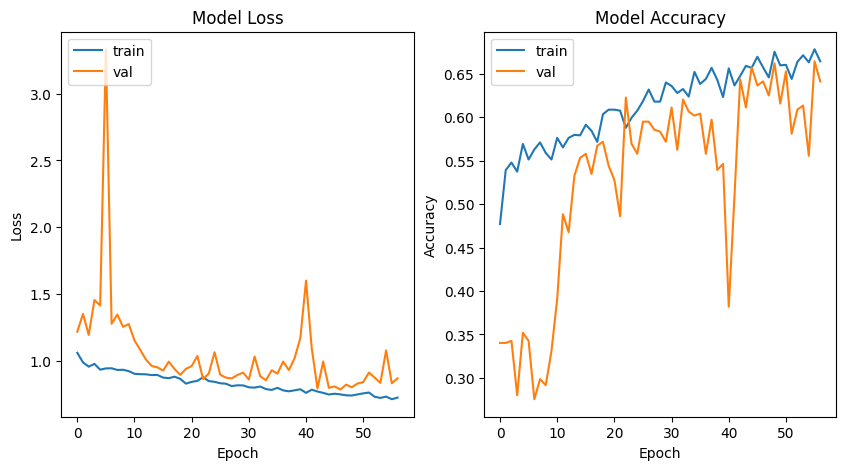

17/17 [==============================] - 13s 695ms/step
Clase 0:
Especificidad: 0.7838616714697406
Sensibilidad: 0.7564766839378239

Clase 1:
Especificidad: 0.8807588075880759
Sensibilidad: 0.52046783625731

Clase 2:
Especificidad: 0.8131868131868132
Sensibilidad: 0.6704545454545454


Matriz de Confusión:
[[146  22  25]
 [ 39  89  43]
 [ 36  22 118]]
Specificity:  [0.7838616714697406, 0.8807588075880759, 0.8131868131868132]
Sensitivity:  [0.7564766839378239, 0.52046783625731, 0.6704545454545454]
Accuracy:  0.6537037037037037
Precision:  [0.66063348 0.66917293 0.6344086 ]
Recall:     [0.75647668 0.52046784 0.67045455]
F1score:    [0.70531401 0.58552632 0.6519337 ]
Iteracion:  2
Epoch 1/150
54/54 [==============================] - 36s 156ms/step - loss: 1.0393 - accuracy: 0.4986 - val_loss: 1.2055 - val_accuracy: 0.3102
Epoch 2/150
54/54 [==============================] - 7s 134ms/step - loss: 0.9806 - accuracy: 0.5357 - val_loss: 1.2956 - val_accuracy: 0.3264
Epoch 3/150
54/54 [========

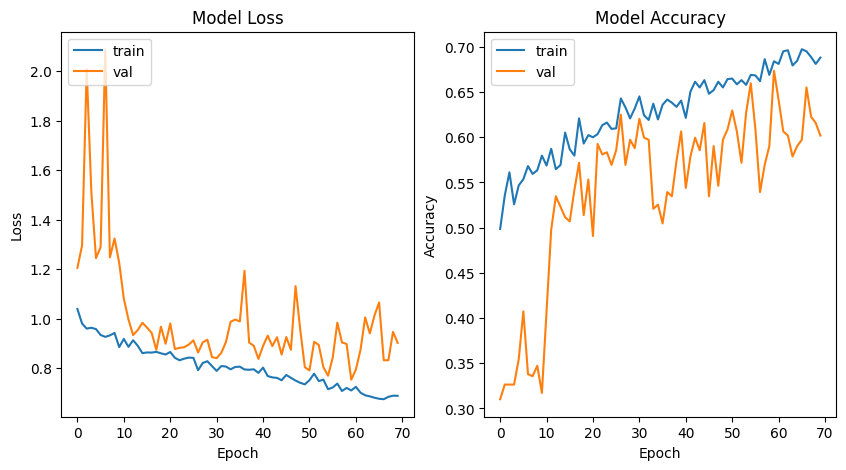

17/17 [==============================] - 15s 788ms/step
Clase 0:
Especificidad: 0.8796561604584527
Sensibilidad: 0.5759162303664922

Clase 1:
Especificidad: 0.8081081081081081
Sensibilidad: 0.5882352941176471

Clase 2:
Especificidad: 0.7867036011080333
Sensibilidad: 0.7821229050279329


Matriz de Confusión:
[[110  43  38]
 [ 31 100  39]
 [ 11  28 140]]
Specificity:  [0.8796561604584527, 0.8081081081081081, 0.7867036011080333]
Sensitivity:  [0.5759162303664922, 0.5882352941176471, 0.7821229050279329]
Accuracy:  0.6481481481481481
Precision:  [0.72368421 0.58479532 0.64516129]
Recall:     [0.57591623 0.58823529 0.78212291]
F1score:    [0.64139942 0.58651026 0.70707071]
Iteracion:  3
Epoch 1/150
54/54 [==============================] - 36s 157ms/step - loss: 1.0535 - accuracy: 0.4945 - val_loss: 1.5475 - val_accuracy: 0.3611
Epoch 2/150
54/54 [==============================] - 7s 133ms/step - loss: 0.9632 - accuracy: 0.5525 - val_loss: 1.9472 - val_accuracy: 0.3611
Epoch 3/150
54/54 [====

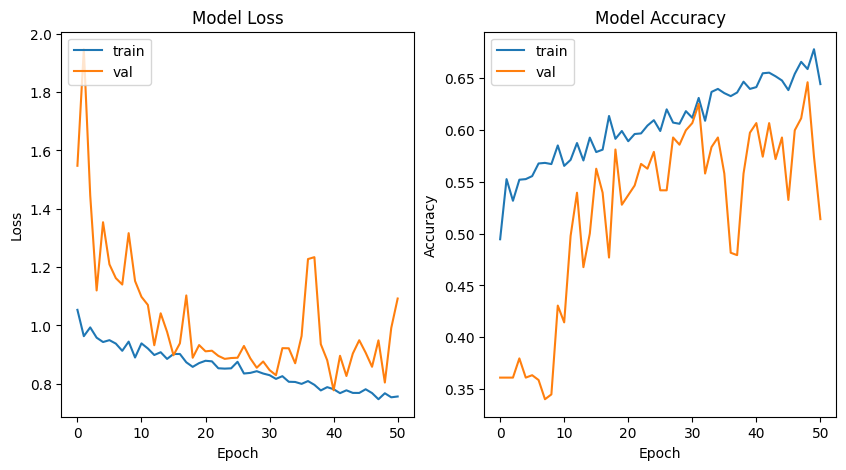

17/17 [==============================] - 14s 768ms/step
Clase 0:
Especificidad: 0.7702702702702703
Sensibilidad: 0.6764705882352942

Clase 1:
Especificidad: 0.7703081232492998
Sensibilidad: 0.6557377049180327

Clase 2:
Especificidad: 0.8640226628895185
Sensibilidad: 0.48128342245989303


Matriz de Confusión:
[[115  37  18]
 [ 33 120  30]
 [ 52  45  90]]
Specificity:  [0.7702702702702703, 0.7703081232492998, 0.8640226628895185]
Sensitivity:  [0.6764705882352942, 0.6557377049180327, 0.48128342245989303]
Accuracy:  0.6018518518518519
Precision:  [0.575      0.59405941 0.65217391]
Recall:     [0.67647059 0.6557377  0.48128342]
F1score:    [0.62162162 0.62337662 0.55384615]
Iteracion:  4
Epoch 1/150
54/54 [==============================] - 36s 156ms/step - loss: 1.0537 - accuracy: 0.4823 - val_loss: 1.2234 - val_accuracy: 0.3264
Epoch 2/150
54/54 [==============================] - 7s 134ms/step - loss: 0.9802 - accuracy: 0.5420 - val_loss: 1.1394 - val_accuracy: 0.2454
Epoch 3/150
54/54 [==

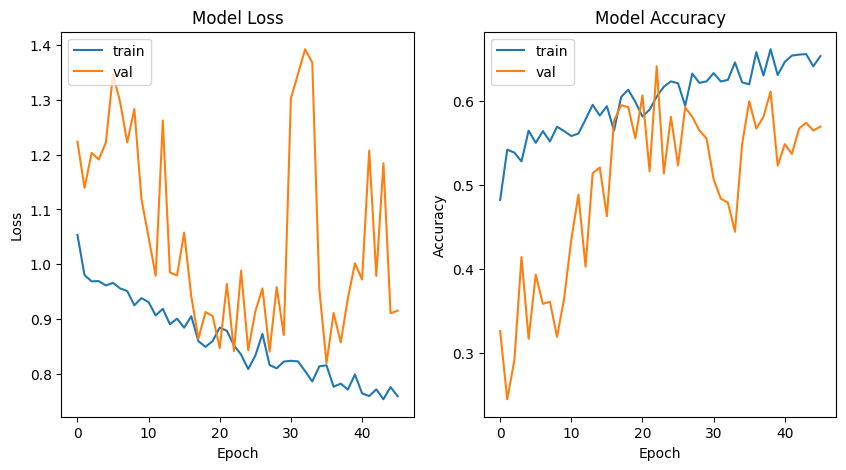

17/17 [==============================] - 13s 688ms/step
Clase 0:
Especificidad: 0.8839779005524862
Sensibilidad: 0.6460674157303371

Clase 1:
Especificidad: 0.84
Sensibilidad: 0.5333333333333333

Clase 2:
Especificidad: 0.7521865889212828
Sensibilidad: 0.7614213197969543


Matriz de Confusión:
[[115  29  34]
 [ 26  88  51]
 [ 16  31 150]]
Specificity:  [0.8839779005524862, 0.84, 0.7521865889212828]
Sensitivity:  [0.6460674157303371, 0.5333333333333333, 0.7614213197969543]
Accuracy:  0.6537037037037037
Precision:  [0.73248408 0.59459459 0.63829787]
Recall:     [0.64606742 0.53333333 0.76142132]
F1score:    [0.68656716 0.56230032 0.69444444]
Iteracion:  5
Epoch 1/150
54/54 [==============================] - 36s 154ms/step - loss: 1.0445 - accuracy: 0.4817 - val_loss: 1.2733 - val_accuracy: 0.3426
Epoch 2/150
54/54 [==============================] - 7s 133ms/step - loss: 0.9850 - accuracy: 0.5368 - val_loss: 1.6860 - val_accuracy: 0.3426
Epoch 3/150
54/54 [==============================] 

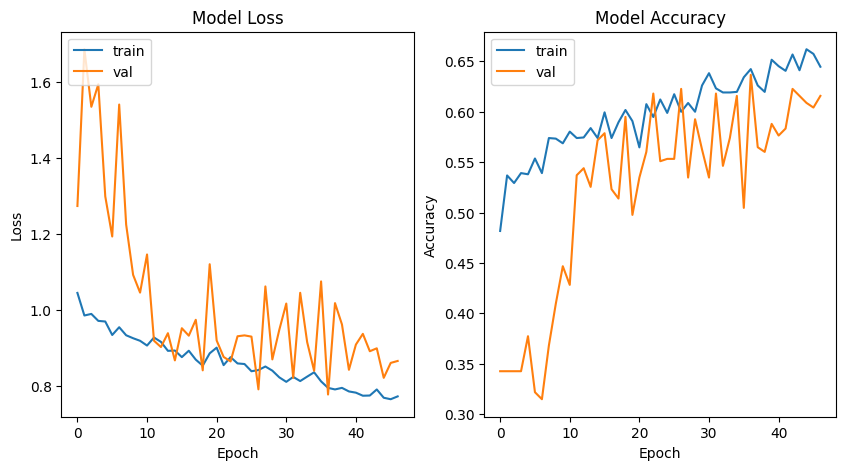

17/17 [==============================] - 13s 686ms/step
Clase 0:
Especificidad: 0.9318801089918256
Sensibilidad: 0.5549132947976878

Clase 1:
Especificidad: 0.71900826446281
Sensibilidad: 0.7796610169491526

Clase 2:
Especificidad: 0.8485714285714285
Sensibilidad: 0.6631578947368421


Matriz de Confusión:
[[ 96  49  28]
 [ 14 138  25]
 [ 11  53 126]]
Specificity:  [0.9318801089918256, 0.71900826446281, 0.8485714285714285]
Sensitivity:  [0.5549132947976878, 0.7796610169491526, 0.6631578947368421]
Accuracy:  0.6666666666666666
Precision:  [0.79338843 0.575      0.70391061]
Recall:     [0.55491329 0.77966102 0.66315789]
F1score:    [0.65306122 0.6618705  0.68292683]
Media
Specificity:  [0.84992922 0.80363666 0.81293422]  |  Sensitivity:  [0.64196884 0.61548704 0.67168802]
Accuracy:  0.6448148148148147  |  Precision:  0.6517843165173335  |  Recall:  0.6430479657412853  |  F1score:  0.6411846199553796

Desviacion
Specificity:  [0.062401   0.05579044 0.04064092]  |  Sensitivity:  [0.07247183

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)
  #Conjutnos de Train, Validation y Test
  x_trainPath, x_testPath, y_trainPath, y_testPath = train_test_split(data, data['DIAGN'], test_size=0.2)
  x_trainPath, x_valPath, y_trainPath, y_valPath = train_test_split(x_trainPath, y_trainPath, test_size=0.2)

  y_trainPath = np.array(y_trainPath)
  y_testPath = np.array(y_testPath)
  y_valPath = np.array(y_valPath)

  #Cargar los path de las imagenes para el pipeline
  dataPathDrive = '/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/'
  path_train = dataPathDrive + x_trainPath["PATH"] + x_trainPath['IMAGE_ID']
  path_test = dataPathDrive + x_testPath["PATH"] + x_testPath['IMAGE_ID']
  path_val = dataPathDrive + x_valPath["PATH"] + x_valPath['IMAGE_ID']

  path_train = np.array(path_train)
  path_test = np.array(path_test)
  path_val = np.array(path_val)

  #Convertir en tensores
  data_train = tf.data.Dataset.from_tensor_slices(path_train)
  data_test = tf.data.Dataset.from_tensor_slices(path_test)
  data_val = tf.data.Dataset.from_tensor_slices(path_val)

  #Procesar y Cargar Imagenes
  data_train = data_train.map(process_image)
  data_test = data_test.map(process_image)
  data_val = data_val.map(process_image)

  train = tf.data.Dataset.from_tensor_slices(to_categorical(y_trainPath, 3))
  train = tf.data.Dataset.zip((data_train,train))

  test = tf.data.Dataset.from_tensor_slices(to_categorical(y_testPath, 3))
  test = tf.data.Dataset.zip((data_test,test))

  val = tf.data.Dataset.from_tensor_slices(to_categorical(y_valPath, 3))
  val = tf.data.Dataset.zip((data_val,val))

  AS = train.batch(batch_size=32)
  AST = test.batch(batch_size=32)
  ASV = val.batch(batch_size=32)

  #Aplicar aumento de datos
  x_train = np.array(list(data_train.as_numpy_iterator()))
  y_train = np.array(list(train.as_numpy_iterator()), dtype=object)
  y_train = np.array([y[1] for y in y_train])

  x_val = np.array(list(data_val.as_numpy_iterator()))
  y_val = np.array(list(val.as_numpy_iterator()), dtype=object)
  y_val = np.array([y[1] for y in y_val])

  data_gen_train = datagen.flow(x_train, y_train, batch_size=32)
  data_gen_val = datagen.flow(x_val, y_val, batch_size=32)

  #Cargar Modelo
  model = modelCompile()

  #Entrenar
  callbackMed=tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0,
        patience=10,
        verbose=0,
        mode='auto',
        baseline=None,
        restore_best_weights=True
    )

  history = model.fit(data_gen_train, epochs=150, verbose=1, validation_data= data_gen_val, callbacks=[callbackMed, TensorBoard(log_dir='./cnntmp/log')])

  #Grafica Rendimiento ========================================
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

  ax1.plot(history.history['loss'])
  ax1.plot(history.history['val_loss'])
  ax1.set_title('Model Loss')
  ax1.set_ylabel('Loss')
  ax1.set_xlabel('Epoch')
  ax1.legend(['train', 'val'], loc='upper left')

  ax2.plot(history.history['accuracy'])
  ax2.plot(history.history['val_accuracy'])
  ax2.set_title('Model Accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.legend(['train', 'val'], loc='upper left')
  plt.show()
  #===========================================================
  model.evaluate(AST)
  pred = model.predict(AST)

  y_testPath = list(y_testPath)
  pred_label=[np.argmax(pred[i]) for i in range(pred.shape[0])]

  mat=confusion_matrix(y_testPath, pred_label)

  num_classes = len(set(y_testPath))
  specificity = []
  sensitivity = []
  for i in range(num_classes):
      tp = mat[i, i]
      tn = sum(sum(mat) - mat[i, :] - mat[:, i]) + tp
      fp = sum(mat[:, i]) - tp
      fn = sum(mat[i, :]) - tp
      specificity_i = tn / (tn + fp)
      sensitivity_i = tp / (tp + fn)
      specificity.append(specificity_i)
      sensitivity.append(sensitivity_i)

  for i in range(num_classes):
      print(f"Clase {i}:")
      print("Especificidad:", specificity[i])
      print("Sensibilidad:", sensitivity[i])
      print()


  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_testPath,pred_label))
  precVec.append(precision_score(y_testPath,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_testPath,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_testPath,pred_label,average=None,zero_division=0))
  print()
  print("Matriz de Confusión:")
  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_testPath,pred_label))
  print("Precision: ",precision_score(y_testPath,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_testPath,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_testPath,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec, axis=0)," | ","Sensitivity: ",np.mean(sensVec, axis=0))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec, axis=0)," | ","Sensitivity: ",np.std(sensVec, axis=0))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))